In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from IPython.display import display, clear_output
import scipy.stats as stats


# I. Forecasting

In [2]:
sales_df=pd.read_csv("forecasting_data.csv")
sales_df

,Period,Sales
0,1,5384
1,2,8081
2,3,10282
3,4,9156
4,5,6118
5,6,9139
6,7,12460
7,8,10717
8,9,7825
9,10,9693


## 1. Visualize and interpret the pattern of this time-series

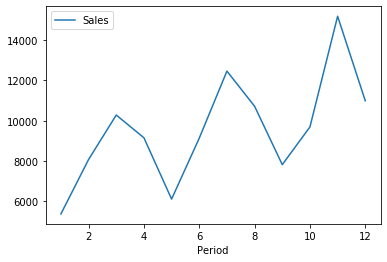

In [3]:
sales_df.plot(x="Period",y="Sales")

## 2. Predict future demand in month 13,14,15,16 without seasonality

### Moving average

In [4]:
sales_df["Moving_average_w_season"]=sales_df["Sales"]
sales_df["Exponential_smoothing_20"]=sales_df["Sales"]
sales_df["Exponential_smoothing_80"]=sales_df["Sales"]

sales_df.loc[12]=np.nan
sales_df.loc[13]=np.nan
sales_df.loc[14]=np.nan
sales_df.loc[15]=np.nan

sales_df["Period"].loc[12]=13
sales_df["Period"].loc[13]=14
sales_df["Period"].loc[14]=15
sales_df["Period"].loc[15]=16

sales_df

,Period,Sales,Moving_average_w_season,Exponential_smoothing_20,Exponential_smoothing_80
0,1.0,5384.0,5384.0,5384.0,5384.0
1,2.0,8081.0,8081.0,8081.0,8081.0
2,3.0,10282.0,10282.0,10282.0,10282.0
3,4.0,9156.0,9156.0,9156.0,9156.0
4,5.0,6118.0,6118.0,6118.0,6118.0
5,6.0,9139.0,9139.0,9139.0,9139.0
6,7.0,12460.0,12460.0,12460.0,12460.0
7,8.0,10717.0,10717.0,10717.0,10717.0
8,9.0,7825.0,7825.0,7825.0,7825.0
9,10.0,9693.0,9693.0,9693.0,9693.0


In [5]:
sales_df["Moving_average_w_season"].loc[12]=(sales_df["Moving_average_w_season"].loc[11]+
                                             sales_df["Moving_average_w_season"].loc[10]+
                                             sales_df["Moving_average_w_season"].loc[9])/3

sales_df["Moving_average_w_season"].loc[13]=(sales_df["Moving_average_w_season"].loc[12]+
                                             sales_df["Moving_average_w_season"].loc[11]+
                                             sales_df["Moving_average_w_season"].loc[10])/3

sales_df["Moving_average_w_season"].loc[14]=(sales_df["Moving_average_w_season"].loc[13]+
                                             sales_df["Moving_average_w_season"].loc[12]+
                                             sales_df["Moving_average_w_season"].loc[11])/3

sales_df["Moving_average_w_season"].loc[15]=(sales_df["Moving_average_w_season"].loc[14]+
                                             sales_df["Moving_average_w_season"].loc[13]+
                                             sales_df["Moving_average_w_season"].loc[12])/3


### Exponential smoothing (0.20)

In [6]:
sales_df["Exponential_smoothing_20"].loc[12]=0.2*sales_df["Exponential_smoothing_20"].loc[11]+(1-0.20)*sales_df["Exponential_smoothing_20"].loc[10]
sales_df["Exponential_smoothing_20"].loc[13]=0.2*sales_df["Exponential_smoothing_20"].loc[12]+(1-0.20)*sales_df["Exponential_smoothing_20"].loc[11]
sales_df["Exponential_smoothing_20"].loc[14]=0.2*sales_df["Exponential_smoothing_20"].loc[13]+(1-0.20)*sales_df["Exponential_smoothing_20"].loc[12]
sales_df["Exponential_smoothing_20"].loc[15]=0.2*sales_df["Exponential_smoothing_20"].loc[14]+(1-0.20)*sales_df["Exponential_smoothing_20"].loc[13]


### Exponential smoothing (0.80)

In [7]:
sales_df["Exponential_smoothing_80"].loc[12]=0.8*sales_df["Exponential_smoothing_80"].loc[11]+(1-0.80)*sales_df["Exponential_smoothing_80"].loc[10]
sales_df["Exponential_smoothing_80"].loc[13]=0.8*sales_df["Exponential_smoothing_80"].loc[12]+(1-0.80)*sales_df["Exponential_smoothing_80"].loc[11]
sales_df["Exponential_smoothing_80"].loc[14]=0.8*sales_df["Exponential_smoothing_80"].loc[13]+(1-0.80)*sales_df["Exponential_smoothing_80"].loc[12]
sales_df["Exponential_smoothing_80"].loc[15]=0.8*sales_df["Exponential_smoothing_80"].loc[14]+(1-0.80)*sales_df["Exponential_smoothing_80"].loc[13]


In [8]:
sales_df

,Period,Sales,Moving_average_w_season,Exponential_smoothing_20,Exponential_smoothing_80
0,1.0,5384.0,5384.000000,5384.0000,5384.0000
1,2.0,8081.0,8081.000000,8081.0000,8081.0000
2,3.0,10282.0,10282.000000,10282.0000,10282.0000
3,4.0,9156.0,9156.000000,9156.0000,9156.0000
4,5.0,6118.0,6118.000000,6118.0000,6118.0000
5,6.0,9139.0,9139.000000,9139.0000,9139.0000
6,7.0,12460.0,12460.000000,12460.0000,12460.0000
7,8.0,10717.0,10717.000000,10717.0000,10717.0000
8,9.0,7825.0,7825.000000,7825.0000,7825.0000
9,10.0,9693.0,9693.000000,9693.0000,9693.0000


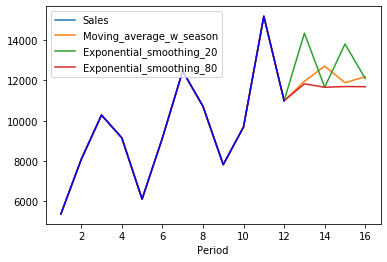

In [9]:
sales_df.plot(x="Period")
plt.plot(sales_df["Period"],sales_df["Sales"],c="b")

In [10]:
sales_df["Season"]=np.nan
sales_df["Average_sales"]=np.nan
sales_df["Index"]=np.nan

sales_df["Season"].iloc[0:4]=1
sales_df["Season"].iloc[4:8]=2
sales_df["Season"].iloc[8:12]=3
#sales_df["Season"].iloc[12:16]=1

sales_df

,Period,Sales,Moving_average_w_season,Exponential_smoothing_20,Exponential_smoothing_80,Season,Average_sales,Index
0,1.0,5384.0,5384.000000,5384.0000,5384.0000,1.0,NaN,NaN
1,2.0,8081.0,8081.000000,8081.0000,8081.0000,1.0,NaN,NaN
2,3.0,10282.0,10282.000000,10282.0000,10282.0000,1.0,NaN,NaN
3,4.0,9156.0,9156.000000,9156.0000,9156.0000,1.0,NaN,NaN
4,5.0,6118.0,6118.000000,6118.0000,6118.0000,2.0,NaN,NaN
5,6.0,9139.0,9139.000000,9139.0000,9139.0000,2.0,NaN,NaN
6,7.0,12460.0,12460.000000,12460.0000,12460.0000,2.0,NaN,NaN
7,8.0,10717.0,10717.000000,10717.0000,10717.0000,2.0,NaN,NaN
8,9.0,7825.0,7825.000000,7825.0000,7825.0000,3.0,NaN,NaN
9,10.0,9693.0,9693.000000,9693.0000,9693.0000,3.0,NaN,NaN


## 3. Predict future demand in month 13,14,15,16 with seasonality

In [11]:
sales_group=sales_df.groupby("Season").mean()
sales_group["Index"]=sales_group["Sales"]/sales_group["Sales"].mean()
sales_group

,Period,Sales,Moving_average_w_season,Exponential_smoothing_20,Exponential_smoothing_80,Average_sales,Index
Season,,,,,,,
1.0,2.5,8225.75,8225.75,8225.75,8225.75,NaN,0.858175
2.0,6.5,9608.50,9608.50,9608.50,9608.50,NaN,1.002434
3.0,10.5,10921.25,10921.25,10921.25,10921.25,NaN,1.139391


In [12]:
sales_df.iloc[0:4,6]=sales_group["Sales"].iloc[0]
sales_df.iloc[4:8,6]=sales_group["Sales"].iloc[1]
sales_df.iloc[8:12,6]=sales_group["Sales"].iloc[2]

sales_df.iloc[0:4,7]=sales_group["Index"].iloc[0]
sales_df.iloc[4:8,7]=sales_group["Index"].iloc[1]
sales_df.iloc[8:12,7]=sales_group["Index"].iloc[2]


sales_df

,Period,Sales,Moving_average_w_season,Exponential_smoothing_20,Exponential_smoothing_80,Season,Average_sales,Index
0,1.0,5384.0,5384.000000,5384.0000,5384.0000,1.0,8225.75,0.858175
1,2.0,8081.0,8081.000000,8081.0000,8081.0000,1.0,8225.75,0.858175
2,3.0,10282.0,10282.000000,10282.0000,10282.0000,1.0,8225.75,0.858175
3,4.0,9156.0,9156.000000,9156.0000,9156.0000,1.0,8225.75,0.858175
4,5.0,6118.0,6118.000000,6118.0000,6118.0000,2.0,9608.50,1.002434
5,6.0,9139.0,9139.000000,9139.0000,9139.0000,2.0,9608.50,1.002434
6,7.0,12460.0,12460.000000,12460.0000,12460.0000,2.0,9608.50,1.002434
7,8.0,10717.0,10717.000000,10717.0000,10717.0000,2.0,9608.50,1.002434
8,9.0,7825.0,7825.000000,7825.0000,7825.0000,3.0,10921.25,1.139391
9,10.0,9693.0,9693.000000,9693.0000,9693.0000,3.0,10921.25,1.139391


# II. Recommender Systems

## 1. Basics of Recommendation Algorithm

In [13]:
M=np.array([[4.,3.,2.,3.],[1.,2.,3.,1.],[np.nan,2.,1.,np.nan],[4.,3.,np.nan,np.nan]])
M

array([[ 4.,  3.,  2.,  3.],
       [ 1.,  2.,  3.,  1.],
       [nan,  2.,  1., nan],
       [ 4.,  3., nan, nan]])

In [14]:
def cosine_similarity(v1,v2, metric='cosine'):
    #metric: cosine or correlation
    if metric == 'correlation':
        v1 = v1 - np.nanmean(v1)
        v2 = v2 - np.nanmean(v2)
    "compute similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        if np.isnan(x) or np.isnan(y): continue
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

def sim_matrix(M, dimension='user', metric='cosine'):
    N = M.shape[0] if dimension == 'user' else M.shape[1]
    sim = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            if i == j:
                sim[i,j] = 0 #Cancel out the effect of self-similarity in the sums later
                continue
            if dimension == 'user':
                v1, v2 = M[i,:], M[j,:]
            else:
                v1, v2 = M[:,i], M[:,j]
            sim[i][j] = cosine_similarity(v1,v2,metric)
    return sim


def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i]+np.nansum(sim_users[i]*(M[:j]-avg_ratings))/sum(sim_users[i])
    return pred

def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[j]+np.nansum(sim_items[j]*(M[i:]-avg_ratings))/sum(sim_items[j])
                #TODO: finish the calculation here
    return pred


def evaluateRS(ratings, groundtruth, method='user_cf', metric='cosine'):
    #method: user_cf and item_cf, metric: cosine and correlation
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    else:
        prediction = item_cf(ratings, metric)
    MSE = mean_squared_error(prediction, groundtruth)
    RMSE = round(np.sqrt(MSE),3)
    print("RMSE using {0} approach ({2}) is: {1}".format(method, RMSE, metric))
    print(pd.DataFrame(prediction))
    return

In [15]:
print("User-based CF (Cosine): \n" + str(pd.DataFrame(user_cf(M, 'cosine'))))

User-based CF (Cosine): 
     0    1         2         3
0  4.0  3.0  2.000000  3.000000
1  1.0  2.0  3.000000  1.000000
2  1.5  2.0  1.000000  0.635524
3  4.0  3.0  4.309017  4.213525


In [16]:
print("Item-based CF (Cosine): \n" + str(pd.DataFrame(item_cf(M, 'cosine'))))


Item-based CF (Cosine): 
          0    1         2         3
0  4.000000  3.0  2.000000  3.000000
1  1.000000  2.0  3.000000  1.000000
2  2.726145  2.0  1.000000  2.075496
3  4.000000  3.0  2.489861  2.537748


In [17]:
M_result = np.asarray([[4,3,2,3], 
                [1,2,3,1],
                [1,2,1,2],
                [4,3,2,4]])
pd.DataFrame(M_result)

,0,1,2,3
0,4,3,2,3
1,1,2,3,1
2,1,2,1,2
3,4,3,2,4


In [18]:
evaluateRS(M,M_result,"user_cf","cosine")
evaluateRS(M,M_result,"item_cf","cosine")


RMSE using user_cf approach (cosine) is: 0.684
     0    1         2         3
0  4.0  3.0  2.000000  3.000000
1  1.0  2.0  3.000000  1.000000
2  1.5  2.0  1.000000  0.635524
3  4.0  3.0  4.309017  4.213525
RMSE using item_cf approach (cosine) is: 0.579
          0    1         2         3
0  4.000000  3.0  2.000000  3.000000
1  1.000000  2.0  3.000000  1.000000
2  2.726145  2.0  1.000000  2.075496
3  4.000000  3.0  2.489861  2.537748


In [19]:

n_users, n_items = M.shape
avg_ratings = np.nanmean(M, axis=1)
sim_users = sim_matrix(M, 'user', 'cosine')

def evaluate_rank(ratings, groundtruth, method='user_cf', metric='cosine'):
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    else:
        prediction = item_cf(ratings, metric)
    
    avg_tau = 0
    for i in range(n_users):
        '''Calculate Kendall’s tau, a correlation measure for ordinal data.
        Kendall’s tau is a measure of the correspondence between two rankings. 
        Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement. '''
        tau, p_value = stats.kendalltau(groundtruth[i,:], prediction[i,:])
        avg_tau += tau
    avg_tau = avg_tau / n_users
    clear_output(wait=True)
    return avg_tau

results = []


results = []
for method in ['user_cf', 'item_cf']:
    for metric in ['cosine']:
        rank_acc = evaluate_rank(M, M_result, method, metric)
        results += ["Rank accuracy of {0} with {1} metric: {2}".format(method, metric, rank_acc)]
print("\n".join(results))

Rank accuracy of user_cf with cosine metric: 0.45435645354123616
Rank accuracy of item_cf with cosine metric: 0.6369306393762916


## 2. Movie Recommendation

In [20]:
# Ignore the timestamp column
ratings = pd.read_csv('ratings.csv', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('users.csv',  encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

### a. Content-Based Recommendation Model

In [21]:
listGen = []
movies['genres'].fillna("").astype('str')
for movie in movies['genres'].values:
    if pd.isnull(movie):
        continue
    items = movie.split('|')
    for item in items:
        if item not in listGen:
            listGen.append(item)

print(listGen)

['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical']


In [22]:
Ij = []

for movie in movies['genres'].values:
    rows = []
    
    for j, item in enumerate(listGen):
        if pd.isnull(movie):
            rows.append(0)
            continue
        if item in movie.split('|'):
            rows.append(1)
        else:
            rows.append(0)
    Ij.append(rows)
print(Ij[:4])

[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]


In [23]:
dataset = pd.merge(ratings, movies)
dataset= dataset.groupby('user_id')['genres'].apply(list)
Uj = []
for row in dataset:
    rows = []
    containsGenres = []
    for item in row:
        if str(item) != 'nan':
            items = item.split('|')
            containsGenres.extend([x for x in items if x not in containsGenres])
    for j, item in enumerate(listGen):
        if item in containsGenres:
            rows.append(1)
        else:
            rows.append(0)
    Uj.append(rows)
print(Uj[:4])

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]]


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(Uj,Ij)
print(cos_sim)
print(cos_sim.shape)

[[0.46291005 0.46291005 0.37796447 ... 0.37796447 0.26726124 0.37796447]
 [0.46291005 0.46291005 0.37796447 ... 0.37796447 0.26726124 0.37796447]
 [0.4472136  0.4472136  0.36514837 ... 0.36514837 0.25819889 0.36514837]
 ...
 [0.46291005 0.46291005 0.37796447 ... 0.37796447 0.26726124 0.37796447]
 [0.4472136  0.4472136  0.36514837 ... 0.36514837 0.25819889 0.36514837]
 [0.4472136  0.4472136  0.36514837 ... 0.36514837 0.25819889 0.36514837]]
(100, 100)


### b. Collaborative Filtering Recommendation Model by Users

In [30]:
def correlation_similarity(v1,v2):
    v1 = v1 - np.nanmean(v1)
    v2 = v2 - np.nanmean(v2)
    "compute similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        if np.isnan(x) or np.isnan(y) or x == 0 or y ==0: continue
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxx == 0 and sumyy == 0:
        sumxx = sumyy = 1
    return sumxy/math.sqrt(sumxx*sumyy)

def sim_matrix(M, dimension='user'):
    N = M.shape[0] if dimension == 'user' else M.shape[1]
    print(N)
    sim = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            if i == j:
                sim[i,j] = 0 #Cancel out the effect of self-similarity in the sums later
                continue
            if dimension == 'user':
                v1, v2 = M[i,:], M[j,:]
            else:
                v1, v2 = M[:,i], M[:,j]
            sim[i][j] = correlation_similarity(v1,v2)
    print(sim.shape)
    return sim

In [26]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [28]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ratings, test_size=0.5)
print(test_data.head())

      user_id  movie_id  rating
4882       66        22       3
1943       26        76       3
864        12        13       1
3051       41        85       4
817        11        56       3


In [29]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')
print(test_data_matrix)

movie_id  1    2    3    4    5    6    7    8    9    10   ...  91   92   \
user_id                                                     ...             
1         3.0  NaN  5.0  NaN  NaN  NaN  3.0  NaN  3.0  2.0  ...  NaN  NaN   
2         3.0  4.0  NaN  NaN  5.0  NaN  NaN  NaN  2.0  4.0  ...  5.0  NaN   
3         NaN  NaN  NaN  3.0  3.0  NaN  NaN  4.0  3.0  3.0  ...  3.0  NaN   
4         1.0  3.0  NaN  NaN  3.0  5.0  3.0  3.0  NaN  NaN  ...  NaN  NaN   
5         NaN  NaN  4.0  NaN  NaN  NaN  4.0  NaN  4.0  NaN  ...  4.0  3.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
96        NaN  NaN  NaN  NaN  NaN  3.0  NaN  5.0  4.0  NaN  ...  2.0  NaN   
97        4.0  NaN  5.0  4.0  1.0  NaN  NaN  NaN  NaN  NaN  ...  1.0  NaN   
98        NaN  3.0  5.0  5.0  NaN  3.0  4.0  3.0  NaN  4.0  ...  NaN  NaN   
99        4.0  NaN  NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  ...  NaN  NaN   
100       4.0  NaN  4.0  5.0  NaN  NaN  NaN  2.0  NaN  NaN  ...  NaN  NaN   

In [31]:
user_correlation = sim_matrix(train_data_matrix.values)
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

100
(100, 100)
[[ 0.         -0.19042703 -0.21930814 ...  0.00703046  0.03325099
   0.40995531]
 [-0.19042703  0.          0.09545466 ...  0.393331   -0.35433907
  -0.09484783]
 [-0.21930814  0.09545466  0.         ... -0.00680797  0.00447964
  -0.11322927]
 ...
 [ 0.00703046  0.393331   -0.00680797 ...  0.          0.06065576
   0.01270501]
 [ 0.03325099 -0.35433907  0.00447964 ...  0.06065576  0.
  -0.18235978]
 [ 0.40995531 -0.09484783 -0.11322927 ...  0.01270501 -0.18235978
   0.        ]]
(100, 100)


In [32]:
# Item Similarity Matrix
item_correlation = sim_matrix(train_data_matrix.values, 'item')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)
print(item_correlation.shape)

100
(100, 100)
[[ 0.          0.01826839  0.00986476 ...  0.0870989  -0.42140605
  -0.07819362]
 [ 0.01826839  0.         -0.12951836 ... -0.59705489 -0.11736765
  -0.20115245]
 [ 0.00986476 -0.12951836  0.         ...  0.55675391 -0.10228371
   0.10668515]
 ...
 [ 0.0870989  -0.59705489  0.55675391 ...  0.          0.31939834
  -0.31244975]
 [-0.42140605 -0.11736765 -0.10228371 ...  0.31939834  0.
   0.42186654]
 [-0.07819362 -0.20115245  0.10668515 ... -0.31244975  0.42186654
   0.        ]]
(100, 100)


In [37]:
from math import sqrt

def user_cf(M, sim_users):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
    return pred

def item_cf(M, sim_items):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,:] - avg_ratings)) / sum(sim_items[j])
    return pred

def predict(ratings, similarity, type='user'):
    if type == 'user':
        pred = user_cf(ratings, user_correlation)
    elif type == 'item':
        pred = item_cf(ratings, item_correlation)
    return pred

def rmse(pred, actual):
    return sqrt(np.nanmean(pred - actual)** 2)

In [38]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix.values, user_correlation, type='user')
item_prediction = predict(train_data_matrix.values, item_correlation, type='item')
 
# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix.values)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix.values)))

User-based CF RMSE: 0.028223460312232457
Item-based CF RMSE: 0.010454871575397134
